In [1]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from joblib import dump, load
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
final_df = pd.read_csv('./final_data//rolled_data.csv')

In [5]:
final_df.shape

(19583, 142)

In [5]:
final_df.columns

Index(['datetime', 'tactic', 'goals_scored_norm_1', 'goals_conceded_norm_1',
       'possession_norm_1', 'shots_norm_1', 'shots_on_target_norm_1',
       'expected_goals_norm_1', 'expected_goals_in_open_play_norm_1',
       'expected_goals_from_set_pieces_norm_1',
       ...
       'dribbles_norm_5', 'touches_opponent_box_norm_5', 'crosses_norm_5',
       'ppda_norm_5', 'gpi_norm_5', 'total_fouls_won_norm_5',
       'total_fouls_conceded_norm_5', 'yellow_cards_norm_5',
       'red_cards_norm_5', 'expected_threat_norm_5'],
      dtype='object', length=142)

In [4]:
final_df = final_df.dropna()

In [6]:
label_encoder = LabelEncoder()
final_df['tactic'] = label_encoder.fit_transform(final_df['tactic'])

In [7]:
# Separacion del dataset
X = final_df.drop(['datetime', 'tactic'], axis=1)
y = final_df['tactic']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_test.shape

(3917, 140)

In [9]:
classes = y_test.value_counts()
print(classes)

tactic
5     672
6     538
8     430
0     375
10    290
9     283
4     261
7     237
1     235
2     234
3     219
11    143
Name: count, dtype: int64


4231 - Contraataque      3427
4231 - Posesion          2718
433 - Posesion           2153
343 - Presion Alta       1860
442 - Posesion           1450
442 - Juego Directo      1330
4141 - Posesion          1275
433 - Juego Directo      1220
352 - Posesion           1204
352 - Presion Alta       1164
41212 - Juego Directo    1035
532 - Contraataque        747

In [9]:
valores_C = [0.01, 0.1, 1, 10, 100]

resultados_cv = {}

for C in valores_C:
    lr_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=C, max_iter=1000)
    cv_scores = cross_val_score(lr_multinomial, X_train, y_train, cv=10)
    resultados_cv[C] = np.mean(cv_scores)

# Encontrar el mejor valor del regularizador
mejor_C = max(resultados_cv, key=resultados_cv.get)
print("best value of C:", mejor_C)

best value of C: 0.01


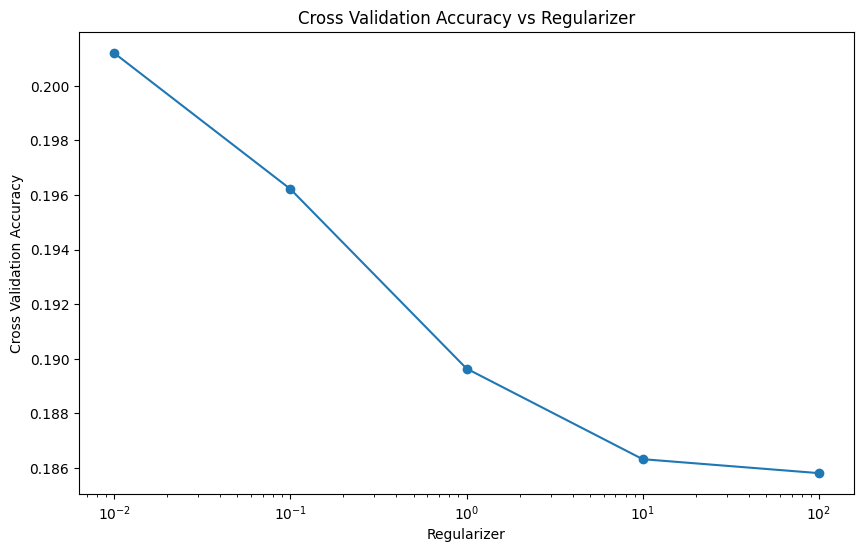

In [10]:
Cs = list(resultados_cv.keys())
scores = list(resultados_cv.values())

plt.figure(figsize=(10, 6))
plt.plot(Cs, scores, marker='o')
plt.xscale('log') 
plt.xlabel('Regularizer')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs Regularizer')
plt.show()

In [14]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=0.01, max_iter=1000)


In [15]:
logreg.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, multi_class='multinomial')

In [85]:
# Guardar el modelo
dump(logreg, 'logreg.joblib')

['logreg.joblib']

In [7]:
# Cargar el modelo
logreg_loaded = load('logreg.joblib')

In [16]:
# Hacer predicciones en el test set
y_pred_logreg = logreg.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
class_report = classification_report(y_test, y_pred_logreg, target_names=label_encoder.classes_)

print("Accuracy:", accuracy)
print("Clasification:\n", class_report)

Accuracy: 0.20040847587439367
Clasification:
                        precision    recall  f1-score   support

   343 - Presion Alta       0.09      0.01      0.01       375
       352 - Posesion       0.00      0.00      0.00       235
   352 - Presion Alta       0.00      0.00      0.00       234
41212 - Juego Directo       0.00      0.00      0.00       219
      4141 - Posesion       0.00      0.00      0.00       261
  4231 - Contraataque       0.21      0.78      0.33       672
      4231 - Posesion       0.19      0.46      0.27       538
  433 - Juego Directo       0.00      0.00      0.00       237
       433 - Posesion       0.18      0.01      0.02       430
  442 - Juego Directo       0.00      0.00      0.00       283
       442 - Posesion       0.00      0.00      0.00       290
   532 - Contraataque       0.00      0.00      0.00       143

             accuracy                           0.20      3917
            macro avg       0.06      0.11      0.05      3917
       

c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [17]:
# Accuracy en el train set
y_pred_train = logreg.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
error_train = 1 - accuracy_train

# Accuracy en el test set
accuracy_test = accuracy_score(y_test, y_pred_logreg)
error_test = 1 - accuracy_test

In [18]:
data = {
    'Train': [accuracy_train, error_train],
    'Test': [accuracy_test, error_test]
}

df = pd.DataFrame(data, index=['Accuracy', 'Error'])
print(df)

             Train      Test
Accuracy  0.205285  0.200408
Error     0.794715  0.799592


In [16]:
class_names = label_encoder.classes_
print(class_names)

['343 - Presion Alta' '352 - Posesion' '352 - Presion Alta'
 '41212 - Juego Directo' '4141 - Posesion' '4231 - Contraataque'
 '4231 - Posesion' '433 - Juego Directo' '433 - Posesion'
 '442 - Juego Directo' '442 - Posesion' '532 - Contraataque']


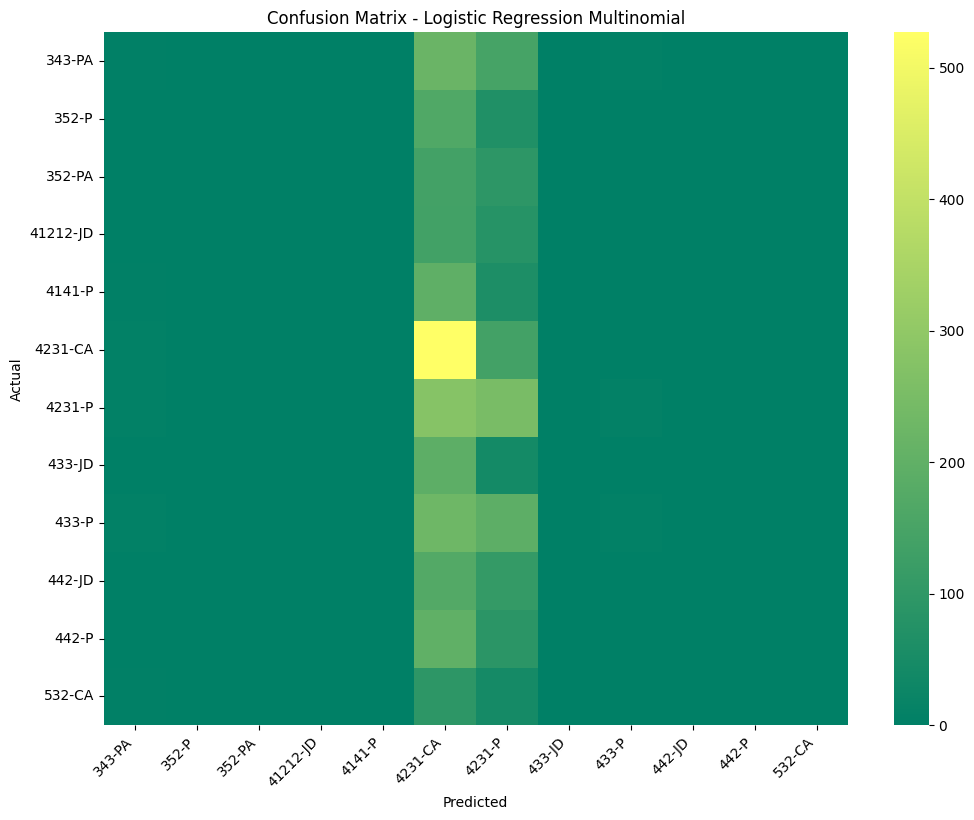

In [19]:
conf_matrix_multinomial = confusion_matrix(y_test, y_pred_logreg)

# Clases abreviadas
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_multinomial, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Multinomial')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [11]:
valores_alpha = [0.0001, 0.001, 0.01, 0.1, 1]

resultados_cv_sgd = {}

for alpha in valores_alpha:
    sgd_modelo = SGDClassifier(loss='log_loss', penalty='l2', alpha=alpha, max_iter=1000)
    cv_scores_sgd = cross_val_score(sgd_modelo, X_train, y_train, cv=10)
    resultados_cv_sgd[alpha] = np.mean(cv_scores_sgd)

# Encontrar el mejor valor del regularizador
mejor_alpha = max(resultados_cv_sgd, key=resultados_cv_sgd.get)
print("Best value of regularizer:", mejor_alpha)

Best value of regularizer: 0.01


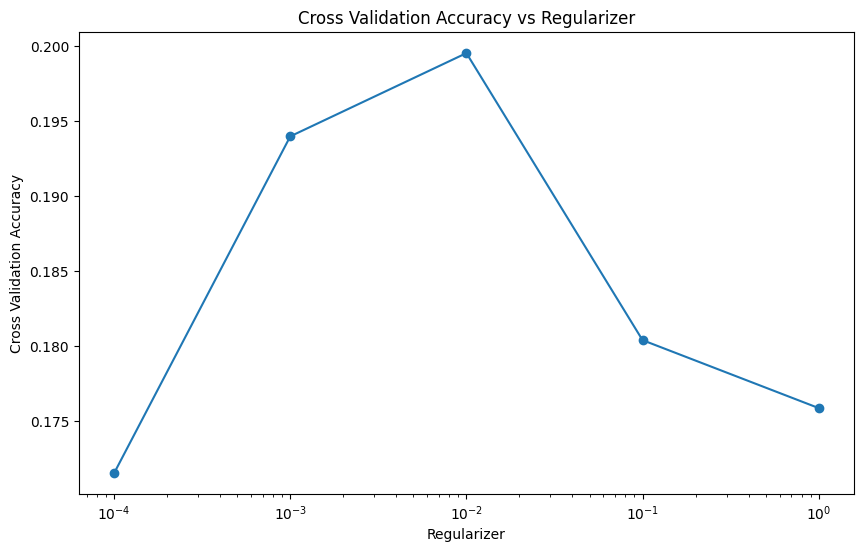

In [12]:
alphas = list(resultados_cv_sgd.keys())
scores = list(resultados_cv_sgd.values())

plt.figure(figsize=(10, 6))
plt.plot(alphas, scores, marker='o')
plt.xscale('log')
plt.xlabel('Regularizer')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs Regularizer')
plt.show()

In [21]:
# Inicializar Regresion Logistica con SGD
sgd_logreg = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.01, max_iter=1000)

In [53]:
# Aplicar validación cruzada k-fold (k=10)
cv_scores_sgd_logreg = cross_val_score(sgd_logreg, X_train, y_train, cv=10)

In [22]:
# Entrenar el modelo SGD con el mejor valor de alpha
sgd_logreg.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss')

In [86]:
dump(sgd_logreg, 'sgd_logreg.joblib')

['sgd_logreg.joblib']

In [ ]:
logreg_loaded = load('logreg.joblib')

In [25]:
# Hacer predicciones en el test set
y_pred_sgd = sgd_logreg.predict(X_test)

# Calcular métricas
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("Accuracy del modelo SGD en el conjunto de prueba:", accuracy_sgd)
print("Informe de Clasificación del modelo SGD:\n", classification_report(y_test, y_pred_sgd, target_names=label_encoder.classes_))


Accuracy del modelo SGD en el conjunto de prueba: 0.20168496298187388
Informe de Clasificación del modelo SGD:
                        precision    recall  f1-score   support

   343 - Presion Alta       0.20      0.00      0.01       375
       352 - Posesion       0.00      0.00      0.00       235
   352 - Presion Alta       0.00      0.00      0.00       234
41212 - Juego Directo       0.00      0.00      0.00       219
      4141 - Posesion       0.00      0.00      0.00       261
  4231 - Contraataque       0.20      0.82      0.33       672
      4231 - Posesion       0.20      0.44      0.27       538
  433 - Juego Directo       0.00      0.00      0.00       237
       433 - Posesion       0.25      0.00      0.01       430
  442 - Juego Directo       0.00      0.00      0.00       283
       442 - Posesion       0.00      0.00      0.00       290
   532 - Contraataque       0.00      0.00      0.00       143

             accuracy                           0.20      3917
    

c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [57]:
# # Accuracy en el train set
y_pred_train_sgd = sgd_logreg.predict(X_train)
accuracy_train_sgd = accuracy_score(y_train, y_pred_train_sgd)
error_train_sgd = 1 - accuracy_train_sgd

# Accuracy en el test set
accuracy_test_sgd = accuracy_score(y_test, y_pred_sgd)
error_test_sgd = 1 - accuracy_test_sgd

data = {
    'Train': [accuracy_train_sgd, error_train_sgd],
    'Test': [accuracy_test_sgd, error_test_sgd]
}

df = pd.DataFrame(data, index=['Accuracy', 'Error'])

# Mostrar la tabla
print(df)

             Train      Test
Accuracy  0.203817  0.199643
Error     0.796183  0.800357


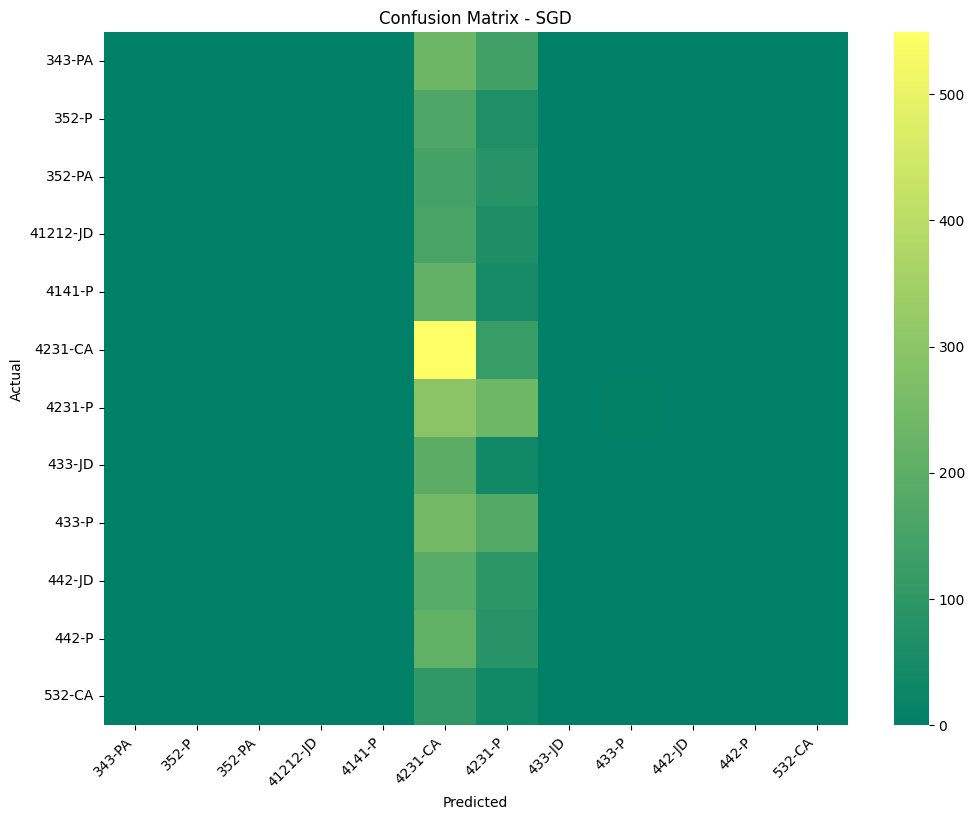

In [24]:
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Clases abreviadas
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_sgd, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SGD')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [22]:
param_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Guardar los resultados
resultados_cv_svm = {}

# Iterar sobre todas las combinaciones posibles
for C in param_svm['C']:
    for gamma in param_svm['gamma']:
        for kernel in param_svm['kernel']:
            svm_modelo = SVC(C=C, gamma=gamma, kernel=kernel)

            # K fold y calcular el accuracy media
            cv_scores_svm = cross_val_score(svm_modelo, X_train, y_train, cv=10, scoring='accuracy')
            resultados_cv_svm[(C, gamma, kernel)] = np.mean(cv_scores_svm)

# Encontrar la mejor combinación de parámetros
mejor_parametros = max(resultados_cv_svm, key=resultados_cv_svm.get)
print("Mejores parámetros para SVM:", mejor_parametros)


Mejores parámetros para SVM: (10, 'auto', 'rbf')


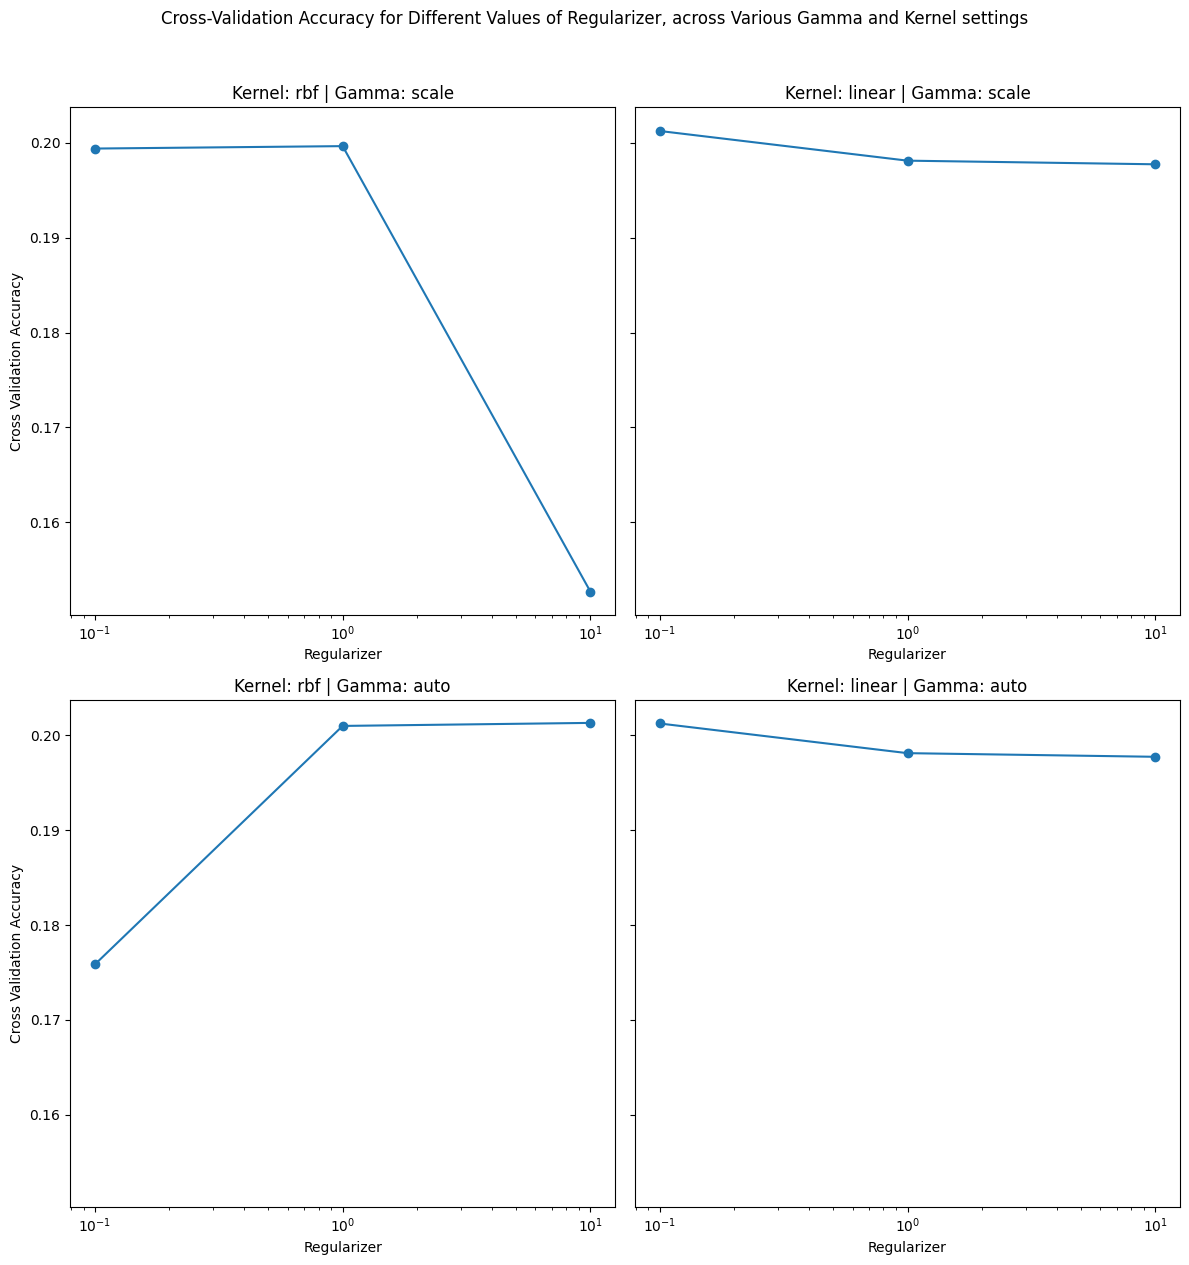

In [23]:
resultados_por_kernel_gamma = {(gamma, kernel): [] for gamma in param_svm['gamma'] for kernel in param_svm['kernel']}

for (C, gamma, kernel), score in resultados_cv_svm.items():
    resultados_por_kernel_gamma[(gamma, kernel)].append((C, score))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True)
axes = axes.flatten()

for i, ((gamma, kernel), ax) in enumerate(zip(resultados_por_kernel_gamma.keys(), axes)):
    resultados = sorted(resultados_por_kernel_gamma[(gamma, kernel)], key=lambda x: x[0])
    Cs = [result[0] for result in resultados]
    scores = [result[1] for result in resultados]
    
    ax.plot(Cs, scores, marker='o')
    ax.set_title(f'Kernel: {kernel} | Gamma: {gamma}')
    ax.set_xlabel('Regularizer')
    ax.set_xscale('log')
    if i % 2 == 0: 
        ax.set_ylabel('Cross Validation Accuracy')

plt.tight_layout()
plt.suptitle('Cross-Validation Accuracy for Different Values of Regularizer, across Various Gamma and Kernel settings', y=1.05) 
plt.show()

In [60]:
# Inicializar el modelo SVM con los mejores hiperparametros
svm_model = SVC(C=0.1, gamma='scale', kernel='linear')

In [62]:
svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [87]:
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [73]:
svm_loaded = load('logreg.joblib')

In [74]:
# Hacer predicciones en el test set
y_pred_svm = svm_loaded.predict(X_test)

# Calcular métricas
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy del modelo SVM en el conjunto de prueba:", accuracy_svm)
print("Informe de Clasificación del modelo SVM:\n", classification_report(y_test, y_pred_svm))

Accuracy del modelo SVM en el conjunto de prueba: 0.2011743681388818
Informe de Clasificación del modelo SVM:
               precision    recall  f1-score   support

           0       0.08      0.01      0.02       375
           1       0.00      0.00      0.00       235
           2       0.00      0.00      0.00       234
           3       0.00      0.00      0.00       219
           4       0.00      0.00      0.00       261
           5       0.21      0.77      0.33       672
           6       0.20      0.48      0.28       538
           7       0.00      0.00      0.00       237
           8       0.22      0.02      0.03       430
           9       0.00      0.00      0.00       283
          10       0.00      0.00      0.00       290
          11       0.00      0.00      0.00       143

    accuracy                           0.20      3917
   macro avg       0.06      0.11      0.05      3917
weighted avg       0.09      0.20      0.10      3917



c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [32]:
# Accuracy en el train set
y_pred_train_svm = svm_loaded.predict(X_train)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
error_train_svm = 1 - accuracy_train_svm

# Accuracy en el test set
accuracy_test_svm = accuracy_score(y_test, y_pred_svm)
error_test_svm = 1 - accuracy_test_svm

data = {
    'Train': [accuracy_train_svm, error_train_svm],
    'Test': [accuracy_test_svm, error_test_svm]
}

df = pd.DataFrame(data, index=['Accuracy', 'Error'])

# Mostrar la tabla
print(df)

             Train      Test
Accuracy  0.205604  0.201174
Error     0.794396  0.798826


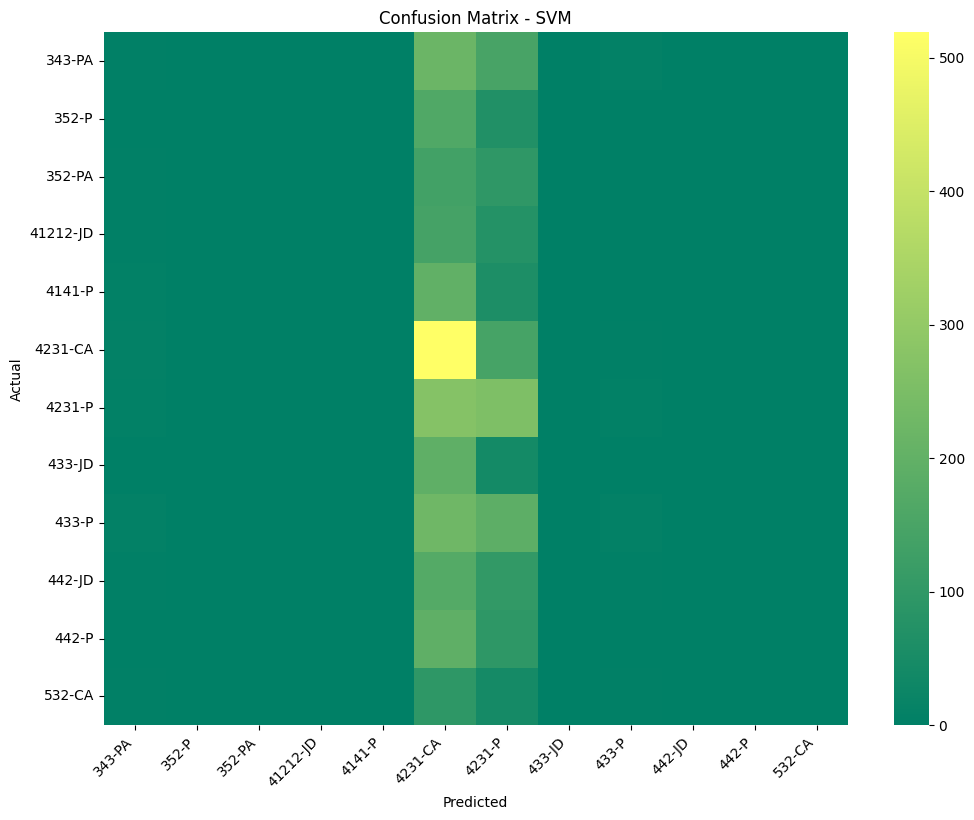

In [75]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Clases abreviadas
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_svm, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
valores_k = range(1, 40, 2)  # todos los valores impares hasta 40

resultados_cv_knn = {}

for k in valores_k:
    knn_modelo = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_modelo, X_train, y_train, cv=10)
    resultados_cv_knn[k] = np.mean(cv_scores)

# Encontrar el mejor valor de k
mejor_k = max(resultados_cv_knn, key=resultados_cv_knn.get)
print("Mejor valor de k (n_neighbors):", mejor_k)

Mejor valor de k (n_neighbors): 37


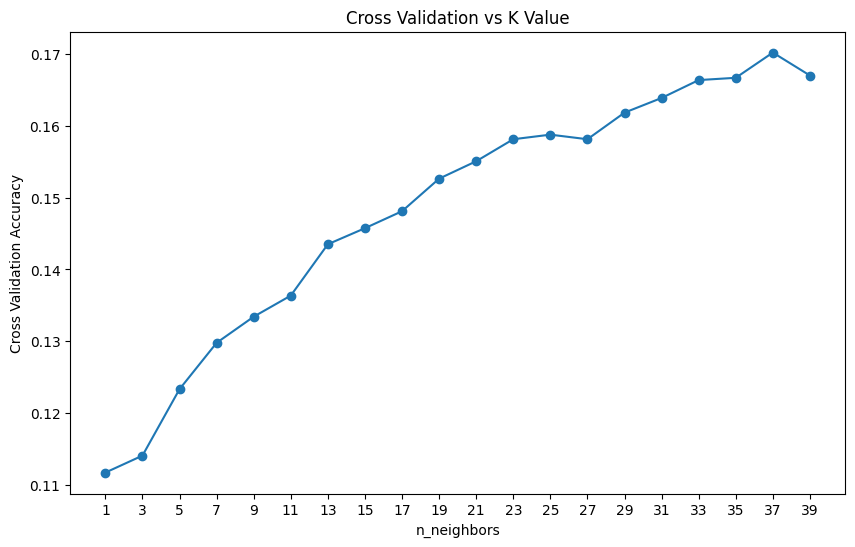

In [15]:
Cs = list(resultados_cv_knn.keys())
scores = list(resultados_cv_knn.values())

plt.figure(figsize=(10, 6))
plt.plot(Cs, scores, marker='o')
plt.xticks(valores_k)
plt.xlabel('n_neighbors')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation vs K Value')
plt.show()

In [75]:
# Inicializar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors = 39)

In [76]:
# Entrenar el modelo KNN con el mejor k
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=39)

In [88]:
dump(knn_model, 'knn_model.joblib')

['knn_model.joblib']

In [29]:
knn_loaded = load('knn_model.joblib')

In [31]:
# Hacer predicciones en el test set
y_pred_knn = knn_loaded.predict(X_test)

# Calcular métricas
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy del modelo KNN en el conjunto de prueba:", accuracy_knn)
print("Informe de Clasificación del modelo KNN:\n", classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

Accuracy del modelo KNN en el conjunto de prueba: 0.16824100076589227
Informe de Clasificación del modelo KNN:
                        precision    recall  f1-score   support

   343 - Presion Alta       0.12      0.16      0.14       375
       352 - Posesion       0.13      0.06      0.09       235
   352 - Presion Alta       0.07      0.03      0.04       234
41212 - Juego Directo       0.07      0.01      0.02       219
      4141 - Posesion       0.13      0.02      0.04       261
  4231 - Contraataque       0.20      0.52      0.29       672
      4231 - Posesion       0.17      0.29      0.22       538
  433 - Juego Directo       0.05      0.00      0.01       237
       433 - Posesion       0.13      0.12      0.12       430
  442 - Juego Directo       0.14      0.02      0.03       283
       442 - Posesion       0.16      0.03      0.05       290
   532 - Contraataque       0.00      0.00      0.00       143

             accuracy                           0.17      3917
    

c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [32]:
# Accuracy en el train set
y_pred_train_knn = knn_loaded.predict(X_train)
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
error_train_knn = 1 - accuracy_train_knn

# Accuracy en el test set
accuracy_test_knn = accuracy_score(y_test, y_pred_knn)
error_test_knn = 1 - accuracy_test_knn

data = {
    'Train': [accuracy_train_knn, error_train_knn],
    'Test': [accuracy_test_knn, error_test_knn]
}

df = pd.DataFrame(data, index=['Accuracy', 'Error'])

# Mostrar la tabla
print(df)

             Train      Test
Accuracy  0.227754  0.168241
Error     0.772246  0.831759


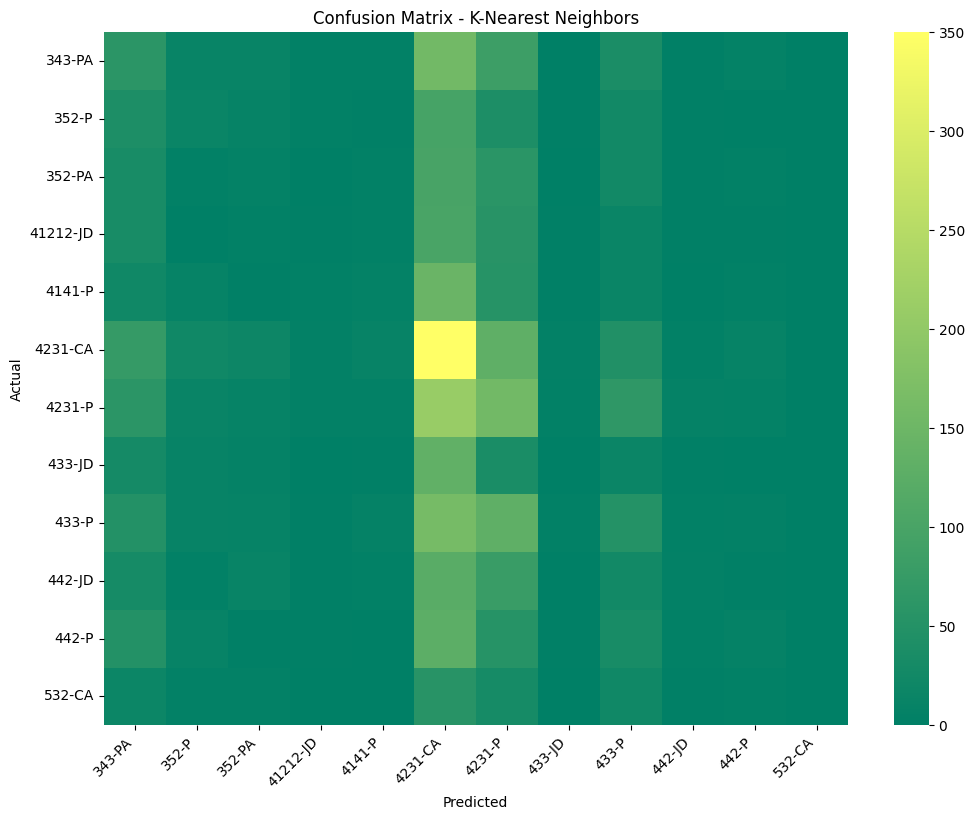

In [33]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Clases abreviadas
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_knn, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
param_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

resultados_cv_dt = {}

# Iterar sobre todas las combinaciones posibles
for max_depth in param_dt['max_depth']:
    for min_samples_split in param_dt['min_samples_split']:
        for min_samples_leaf in param_dt['min_samples_leaf']:
            dt_modelo = DecisionTreeClassifier(max_depth=max_depth, 
                                               min_samples_split=min_samples_split, 
                                               min_samples_leaf=min_samples_leaf)

            # K fold y calcular la precisión media
            cv_scores_dt = cross_val_score(dt_modelo, X_train, y_train, cv=10, scoring='accuracy')
            resultados_cv_dt[(max_depth, min_samples_split, min_samples_leaf)] = np.mean(cv_scores_dt)

# Encontrar la mejor combinación de parámetros
mejores_parametros_dt = max(resultados_cv_dt, key=resultados_cv_dt.get)
print("Mejores parámetros para Decision Tree:", mejores_parametros_dt)

Mejores parámetros para Decision Tree: (10, 2, 1)


In [10]:
print(resultados_cv_dt)

{(None, 2, 1): 0.11528165931924486, (None, 2, 2): 0.12064470671846945, (None, 2, 4): 0.11815367399615799, (None, 5, 1): 0.11789816465234022, (None, 5, 2): 0.12007007557697433, (None, 5, 4): 0.11604810584851515, (None, 10, 1): 0.11853714176734223, (None, 10, 2): 0.1195584048718745, (None, 10, 4): 0.11917526310942239, (10, 2, 1): 0.16468828267565147, (10, 2, 2): 0.16526287306605508, (10, 2, 4): 0.16443240657201003, (10, 5, 1): 0.1646883641778345, (10, 5, 2): 0.16462438496415127, (10, 5, 4): 0.1644961820302357, (10, 10, 1): 0.1649434660107371, (10, 10, 2): 0.16526250630623143, (10, 10, 4): 0.16436875336705895, (20, 2, 1): 0.11943077245324016, (20, 2, 2): 0.12434678037851243, (20, 2, 4): 0.12453676196716927, (20, 5, 1): 0.12013275075572898, (20, 5, 2): 0.12058015698950497, (20, 5, 4): 0.12485572076048057, (20, 10, 1): 0.12364382404982718, (20, 10, 2): 0.12517529082016463, (20, 10, 4): 0.12747230759575895, (30, 2, 1): 0.11311186745136967, (30, 2, 2): 0.11821887574258676, (30, 2, 4): 0.11930

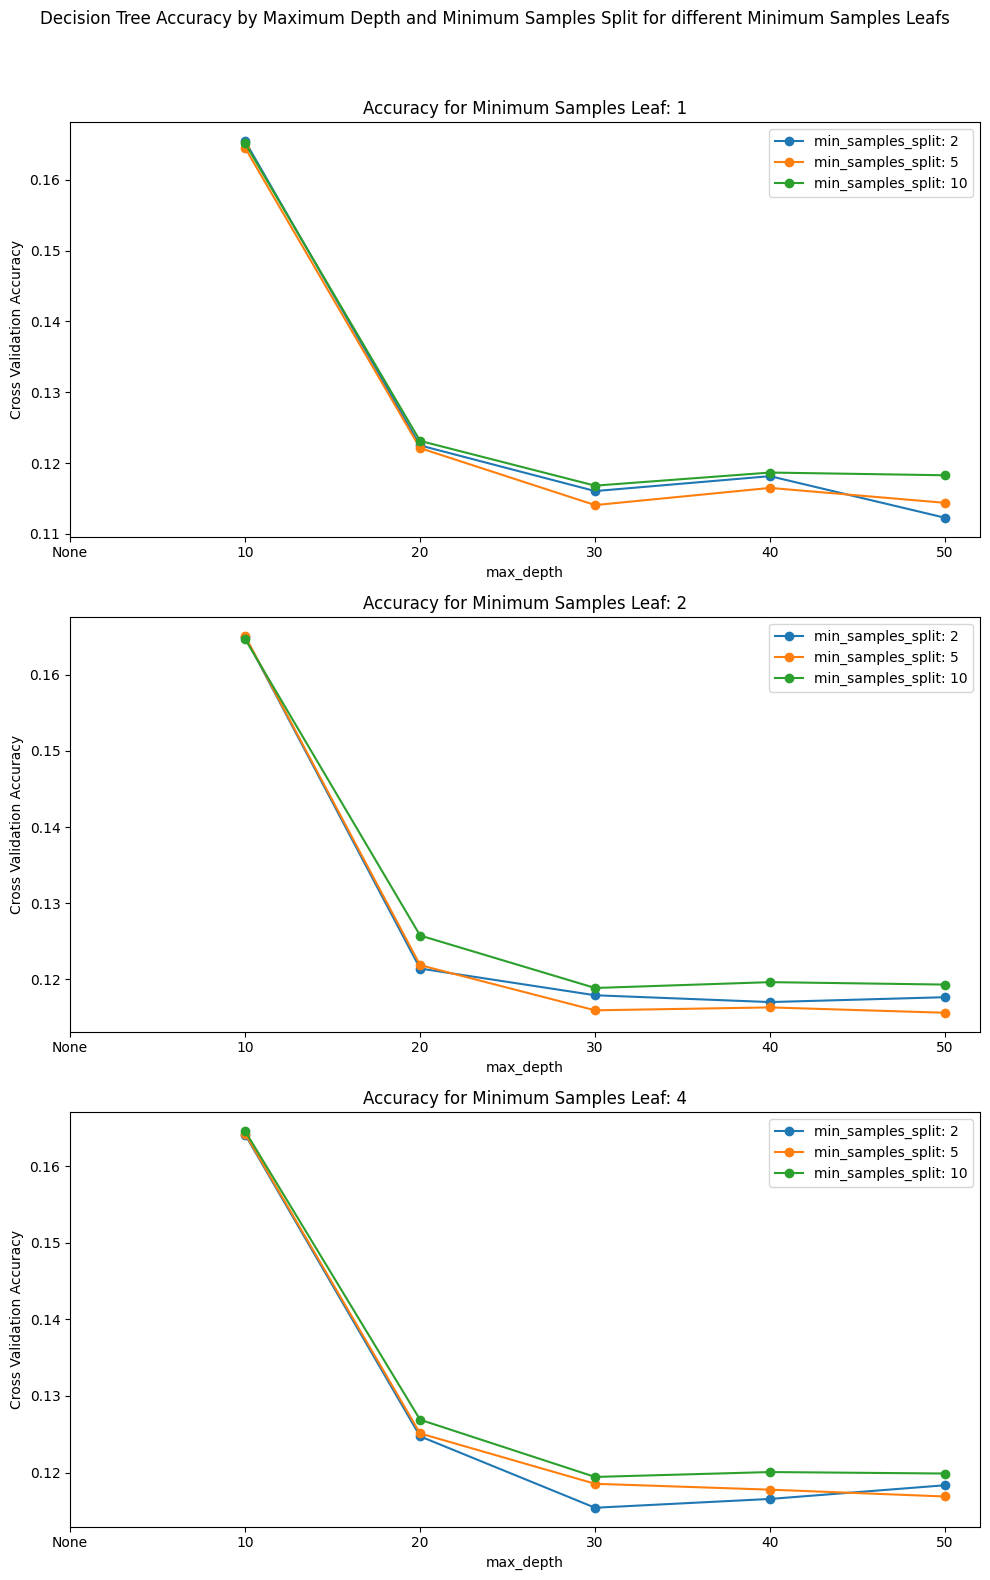

In [10]:
# Configuraciones para graficar
max_depths = [None, 10, 20, 30, 40, 50]
max_depth_labels = ['None', '10', '20', '30', '40', '50']
min_samples_splits = param_dt['min_samples_split']
min_samples_leafs = param_dt['min_samples_leaf']

fig, axs = plt.subplots(len(min_samples_leafs), 1, figsize=(10, len(min_samples_leafs)*5))

# Iterar sobre cada valor de min_samples_leaf
for idx, min_samples_leaf in enumerate(min_samples_leafs):
    ax = axs[idx]
    for min_samples_split in min_samples_splits:
        accuracies = [resultados_cv_dt.get((md if md is not None else 'None', min_samples_split, min_samples_leaf), None) for md in max_depths]
        
        ax.plot(max_depth_labels, accuracies, marker='o', label=f'min_samples_split: {min_samples_split}')
    
    ax.set_title(f'Accuracy for Minimum Samples Leaf: {min_samples_leaf}')
    ax.set_xlabel('max_depth')
    ax.set_ylabel('Cross Validation Accuracy')    
    # Configurar los ticks y las etiquetas para el eje x
    ax.set_xticks(range(len(max_depth_labels)))
    ax.set_xticklabels(max_depth_labels)
    ax.legend(loc='upper right')

# Ajustar el espacio
plt.tight_layout()

fig.suptitle('Decision Tree Accuracy by Maximum Depth and Minimum Samples Split for different Minimum Samples Leafs', y=1.05)

# Mostrar la gráfica
plt.show()

In [11]:
# Inicializar el modelo de Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=10,
    min_samples_split=5,
    min_samples_leaf=1)

In [56]:
# Aplicar k-fold
cv_scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=10)

KeyboardInterrupt: 

In [68]:
cv_score_mean_dt = np.mean(cv_scores_dt)
cv_score_std_dt = np.std(cv_scores_dt)

print("Promedio de la validación cruzada: ", cv_score_mean_dt)
print("Desviación estándar de la validación cruzada: ", cv_score_std_dt)

Promedio de la validación cruzada:  0.16404934631174098
Desviación estándar de la validación cruzada:  0.00835907771952258


In [57]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [58]:
# Hacer predicciones en el test set
y_pred_dt = dt_classifier.predict(X_test)

# Calcular métricas
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy del modelo Árbol de Decisión en el conjunto de prueba:", accuracy_dt)
print("Informe de Clasificación del modelo Árbol de Decisión:\n", classification_report(y_test, y_pred_dt))

Accuracy del modelo Árbol de Decisión en el conjunto de prueba: 0.1590502935920347
Informe de Clasificación del modelo Árbol de Decisión:
               precision    recall  f1-score   support

           0       0.09      0.10      0.09       375
           1       0.02      0.00      0.01       235
           2       0.12      0.01      0.02       234
           3       0.00      0.00      0.00       219
           4       0.07      0.02      0.02       261
           5       0.21      0.44      0.28       672
           6       0.17      0.50      0.25       538
           7       0.02      0.00      0.01       237
           8       0.05      0.01      0.02       430
           9       0.05      0.01      0.02       283
          10       0.11      0.02      0.03       290
          11       0.00      0.00      0.00       143

    accuracy                           0.16      3917
   macro avg       0.08      0.09      0.06      3917
weighted avg       0.10      0.16      0.10      

In [25]:
# Precisión en el conjunto de entrenamiento
y_pred_train_dt = dt_classifier.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
error_train_dt = 1 - accuracy_train_dt

# Accuracy en el test set
accuracy_test_dt = accuracy_score(y_test, y_pred_dt)
error_test_dt = 1 - accuracy_test_dt

data = {
    'Train': [accuracy_train_dt, error_train_dt],
    'Test': [accuracy_test_dt, error_test_dt]
}

df = pd.DataFrame(data, index=['Accuracy', 'Error'])

# Mostrar la tabla
print(df)

             Train     Test
Accuracy  0.283991  0.15905
Error     0.716009  0.84095


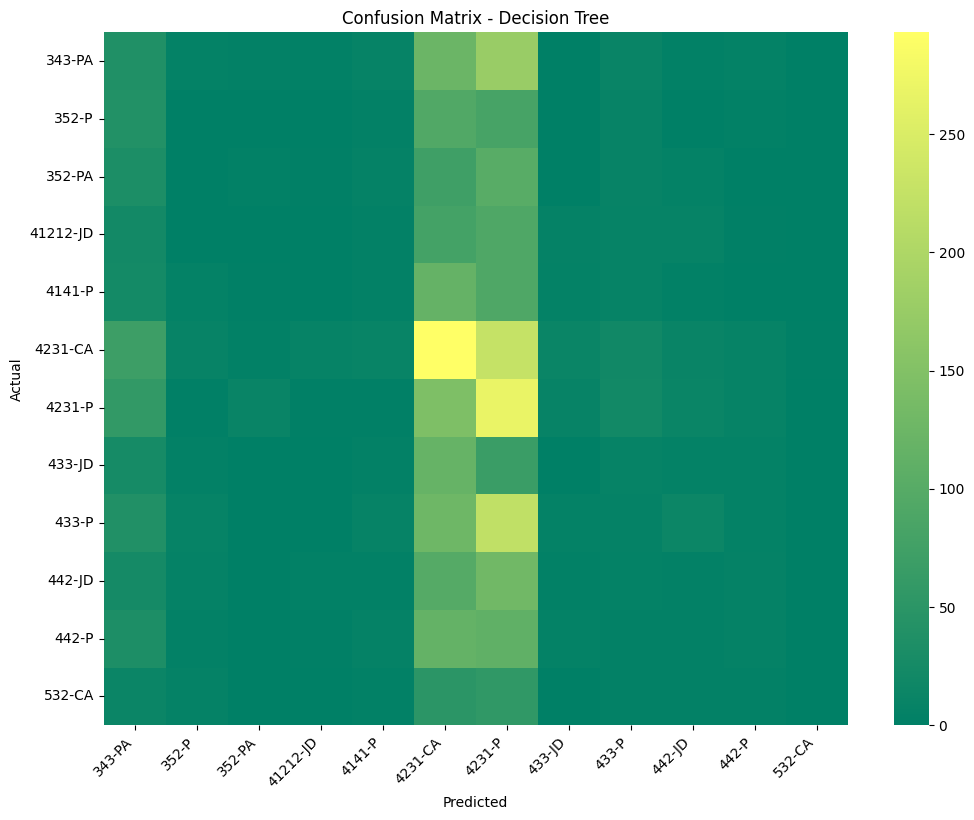

In [59]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Nombres de clases abreviados
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_dt, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
n_estimators_values = [100, 200, 300]

resultados_cv_rf_n_estimators = {}

for n_estimators in n_estimators_values:
    modelo_rf = RandomForestClassifier(n_estimators=n_estimators)
    cv_scores = cross_val_score(modelo_rf, X_train, y_train, cv=10)
    resultados_cv_rf_n_estimators[n_estimators] = np.mean(cv_scores)

# Encontrar el mejor valor de n_estimators
mejor_n_estimators = max(resultados_cv_rf_n_estimators, key=resultados_cv_rf_n_estimators.get)
print("Mejor valor de n_estimators:", mejor_n_estimators)

Mejor valor de n_estimators: 300


In [14]:
max_depth_values = [None, 10, 20, 30]

resultados_cv_rf_max_depth = {}

for max_depth in max_depth_values:
    modelo_rf = RandomForestClassifier(n_estimators=mejor_n_estimators, max_depth=max_depth)
    cv_scores = cross_val_score(modelo_rf, X_train, y_train, cv=10)
    resultados_cv_rf_max_depth[max_depth] = np.mean(cv_scores)

# Encontrar el mejor valor de max_depth
mejor_max_depth = max(resultados_cv_rf_max_depth, key=resultados_cv_rf_max_depth.get)
print("Mejor valor de max_depth:", mejor_max_depth)

Mejor valor de max_depth: 10


In [15]:
min_samples_split_values = [2, 5, 10]

resultados_cv_rf_min_samples_split = {}

for min_samples_split in min_samples_split_values:
    modelo_rf = RandomForestClassifier(n_estimators=mejor_n_estimators, 
                                       max_depth=mejor_max_depth, 
                                       min_samples_split=min_samples_split)
    cv_scores = cross_val_score(modelo_rf, X_train, y_train, cv=10)
    resultados_cv_rf_min_samples_split[min_samples_split] = np.mean(cv_scores)

# Encontrar el mejor valor de min_samples_split
mejor_min_samples_split = max(resultados_cv_rf_min_samples_split, key=resultados_cv_rf_min_samples_split.get)
print("Mejor valor de min_samples_split:", mejor_min_samples_split)

Mejor valor de min_samples_split: 2


In [16]:
min_samples_leaf_values = [1, 2, 4]

resultados_cv_rf_min_samples_leaf = {}

for min_samples_leaf in min_samples_leaf_values:
    modelo_rf = RandomForestClassifier(n_estimators=mejor_n_estimators, 
                                       max_depth=mejor_max_depth, 
                                       min_samples_split=mejor_min_samples_split, 
                                       min_samples_leaf=min_samples_leaf)
    cv_scores = cross_val_score(modelo_rf, X_train, y_train, cv=10)
    resultados_cv_rf_min_samples_leaf[min_samples_leaf] = np.mean(cv_scores)

# Encontrar el mejor valor de min_samples_leaf
mejor_min_samples_leaf = max(resultados_cv_rf_min_samples_leaf, key=resultados_cv_rf_min_samples_leaf.get)
print("Mejor valor de min_samples_leaf:", mejor_min_samples_leaf)

Mejor valor de min_samples_leaf: 2


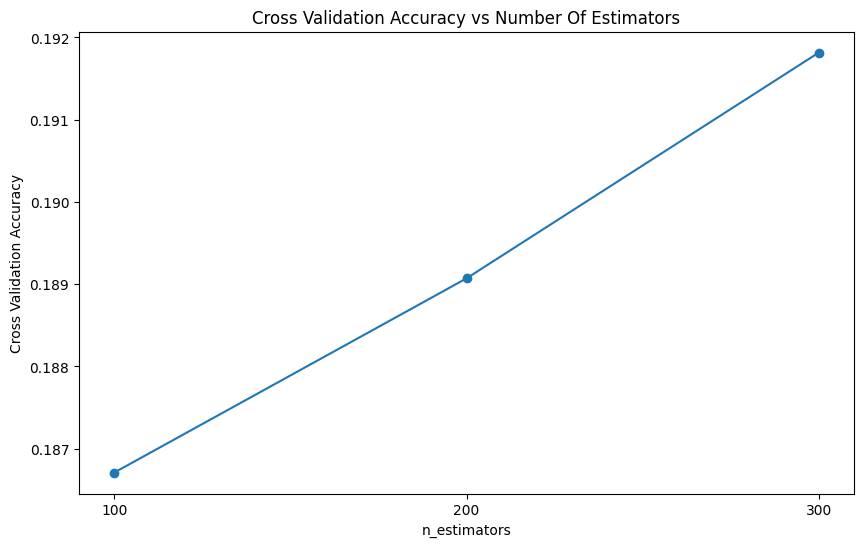

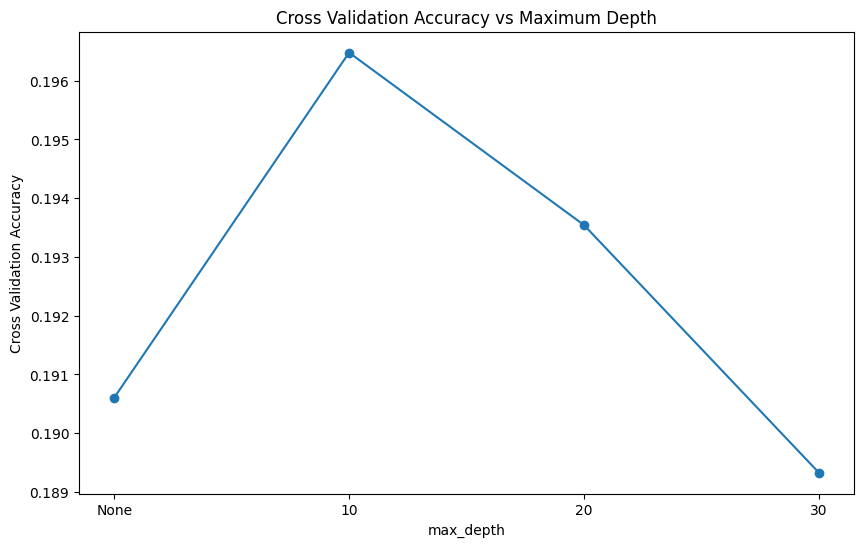

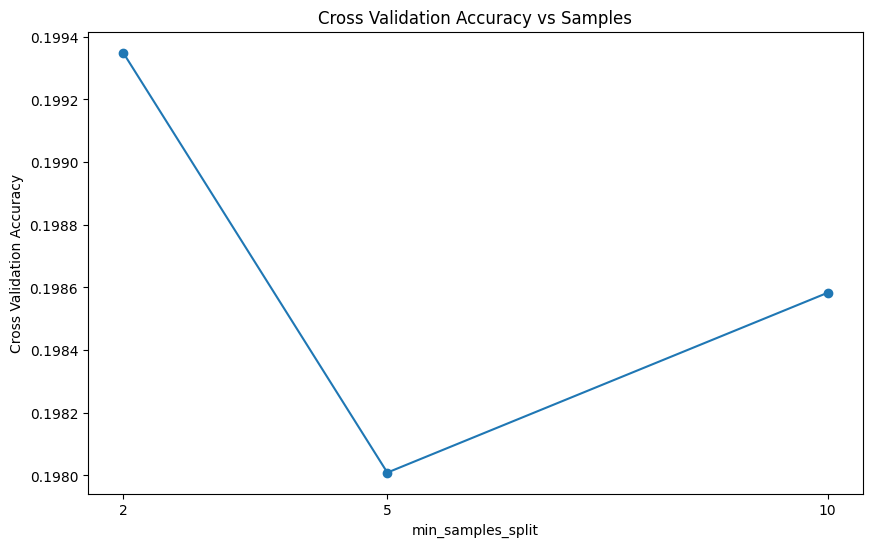

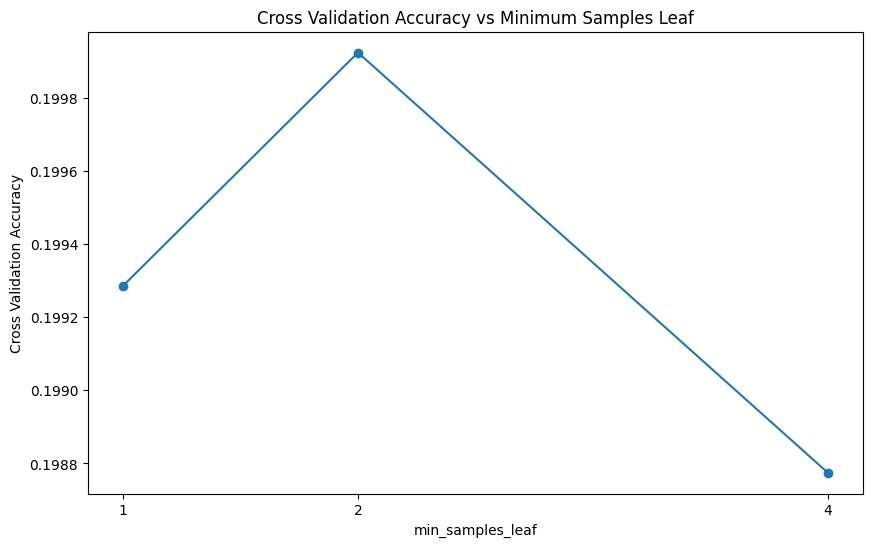

In [17]:
# Resultados para n_estimators
n_estimators = list(resultados_cv_rf_n_estimators.keys())
cv_scores_estimators = list(resultados_cv_rf_n_estimators.values())

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, cv_scores_estimators, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs Number Of Estimators')
plt.xticks(n_estimators)
plt.show()

# Resultados para max_depth
max_depth_str = [str(depth) if depth is not None else 'None' for depth in max_depth_values]
cv_scores_depth = list(resultados_cv_rf_max_depth.values())

plt.figure(figsize=(10, 6))
plt.plot(max_depth_str, cv_scores_depth, marker='o')
plt.xlabel('max_depth')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs Maximum Depth')
plt.xticks(range(len(max_depth_values)), max_depth_str)
plt.show()

# Resultados para min_samples_split
min_samples_splits = list(resultados_cv_rf_min_samples_split.keys())
cv_scores_splits = list(resultados_cv_rf_min_samples_split.values())

plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, cv_scores_splits, marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs Samples')
plt.xticks(min_samples_splits)
plt.show()

# Resultados para min_samples_leaf
min_samples_leafs = list(resultados_cv_rf_min_samples_leaf.keys())
cv_scores_leafs = list(resultados_cv_rf_min_samples_leaf.values())

plt.figure(figsize=(10, 6))
plt.plot(min_samples_leafs, cv_scores_leafs, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs Minimum Samples Leaf')
plt.xticks(min_samples_leafs)
plt.show()

In [66]:
# Inicializar Random Forest
rf_classifier = RandomForestClassifier(n_estimators=300, 
                                         max_depth=10, 
                                         min_samples_split=10, 
                                         min_samples_leaf=2)

In [67]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=300)

In [89]:
dump(rf_classifier, 'rf_classifier.joblib')

['rf_classifier.joblib']

In [68]:
rf_loaded = load('rf_classifier.joblib')

In [69]:
# Hacer predicciones en el test set
y_pred_rf = rf_loaded.predict(X_test)
# Calcular métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy del modelo Random Forest en el conjunto de prueba:", accuracy_rf)
print("Informe de Clasificación del modelo Random Forest:\n", classification_report(y_test, y_pred_rf))

Accuracy del modelo Random Forest en el conjunto de prueba: 0.19913198876691346
Informe de Clasificación del modelo Random Forest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       375
           1       0.50      0.00      0.01       235
           2       0.00      0.00      0.00       234
           3       0.00      0.00      0.00       219
           4       0.00      0.00      0.00       261
           5       0.21      0.74      0.32       672
           6       0.19      0.51      0.27       538
           7       0.00      0.00      0.00       237
           8       0.22      0.00      0.01       430
           9       0.00      0.00      0.00       283
          10       0.00      0.00      0.00       290
          11       0.00      0.00      0.00       143

    accuracy                           0.20      3917
   macro avg       0.09      0.11      0.05      3917
weighted avg       0.12      0.20      0.09      3917



c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\GEEK STORE\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

In [41]:
# Accuracy en el train set
y_pred_train_rf = rf_loaded.predict(X_train)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
error_train_rf = 1 - accuracy_train_rf

# Accuracy en el test set
accuracy_test_rf = accuracy_score(y_test, y_pred_rf)
error_test_rf = 1 - accuracy_test_rf

data = {
    'Train': [accuracy_train_rf, error_train_rf],
    'Test': [accuracy_test_rf, error_test_rf]
}

df = pd.DataFrame(data, index=['Accuracy', 'Error'])

# Mostrar la tabla
print(df)

             Train      Test
Accuracy  0.347632  0.199132
Error     0.652368  0.800868


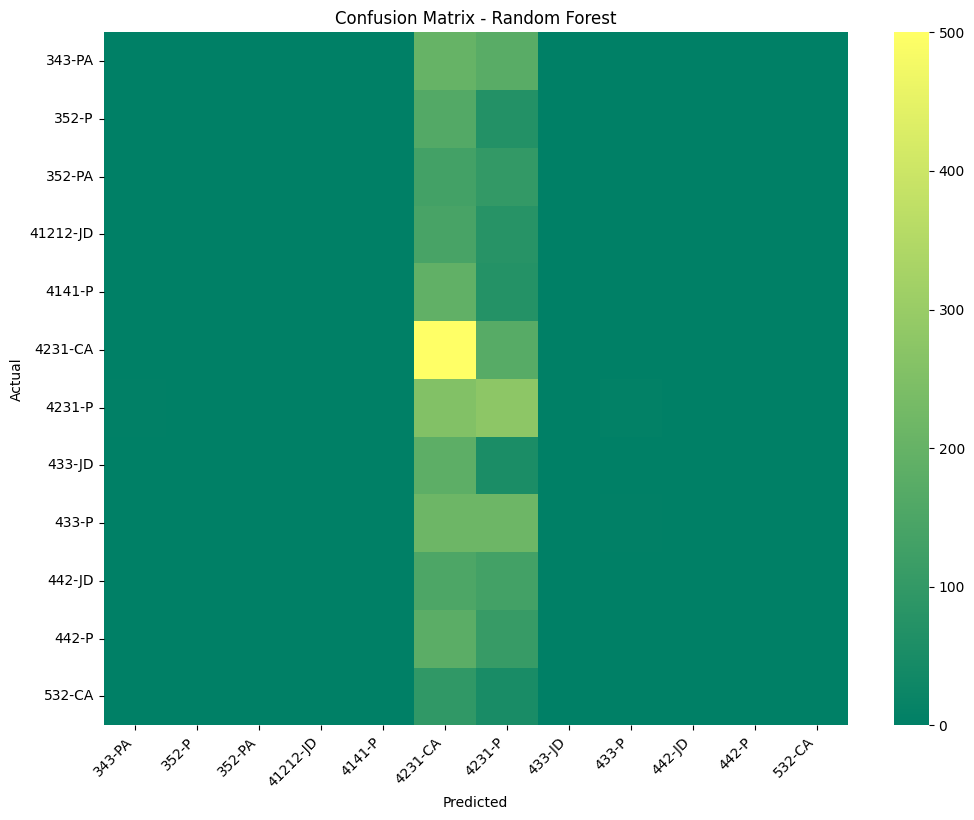

In [70]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Clases abreviadas
class_names_short = ['343-PA', '352-P', '352-PA', '41212-JD', '4141-P', '4231-CA', 
                     '4231-P', '433-JD', '433-P', '442-JD', '442-P', '532-CA']

plt.figure(figsize=(12, 9))
sns.heatmap(conf_matrix_rf, annot=False, fmt='g', cmap='summer',
            xticklabels=class_names_short, yticklabels=class_names_short)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()